In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# <center>Deep Learning</center>

* ## Score function
Linear regressor, SVM, Neural Network ...
* ## Loss function
L2/MeanSquared loss, L1 loss, CrossEntropy loss ...
* ## Optimization
SGD, Nesterov Momentum, Adam ...

## Neural Networks

<tr>
<td> <img src="img/neuron.png" style="height: 250px;"/> </td>
<td> <img src="img/neuron_model.jpeg" style="height: 250px;"/> </td>
</tr>


**Calculate number of parameters.**

<tr>
<td> <img src="img/neural_net.jpeg" style="height: 250px;"/> </td>
<td> <img src="img/neural_net2.jpeg" style="height: 250px;"/> </td>
</tr>


## Activation functions

#### Sigmoid

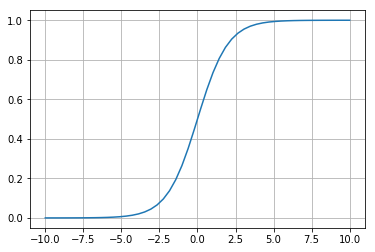

In [9]:
plt.plot(np.linspace(-10, 10), 1/(1+np.exp(-np.linspace(-10, 10))));plt.grid()

$\large \sigma(x)=\frac{1}{1+e^{-x}}$
<br>
It takes a real-valued number and “squashes” it into range between 0 and 1. In particular, large negative numbers become 0 and large positive numbers become 1. The sigmoid function has seen frequent use historically since it has a nice interpretation as the firing rate of a neuron: from not firing at all (0) to fully-saturated firing at an assumed maximum frequency (1). In practice, the sigmoid non-linearity has recently fallen out of favor and it is rarely ever used. It has two major drawbacks:

1. Sigmoids saturate and kill gradients. Note that $\sigma'(x) = \sigma(x) (1-\sigma(x))$. When the neuron’s activation saturates at either tail of 0 or 1, the gradient at these regions is almost zero. Recall that during backpropagation, this (local) gradient will be multiplied to the gradient of this gate’s output for the whole objective. Therefore, if the local gradient is very small, it will effectively “kill” the gradient and almost no signal will flow through the neuron to its weights and recursively to its data. Additionally, one must pay extra caution when initializing the weights of sigmoid neurons to prevent saturation. For example, if the initial weights are too large then most neurons would become saturated and the network will barely learn.
2. Sigmoid outputs are not zero-centered. If the data coming into a neuron is always positive (e.g. $x>0$ elementwise in $f=w^Tx+b$)), then the gradient on the weights w will during backpropagation become either all be positive, or all negative (depending on the gradient of the whole expression $f$). This could introduce undesirable zig-zagging dynamics in the gradient updates. However, notice that once these gradients are added up across a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue.

#### Tanh

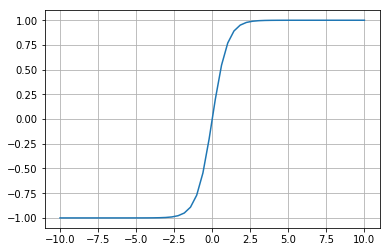

In [11]:
plt.plot(np.linspace(-10, 10), np.tanh(np.linspace(-10, 10)));plt.grid()

Note that the tanh neuron is a scaled sigmoid neuron:
<br>
$\large tanh(x)=\frac{e^x - e^{-x}}{e^x + e^{-x}} = 2\sigma(2x)-1$
<br>
It squashes a real-valued number to the range [-1, 1]. Like the sigmoid neuron, its activations saturate, but unlike the sigmoid neuron its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity.

#### ReLU

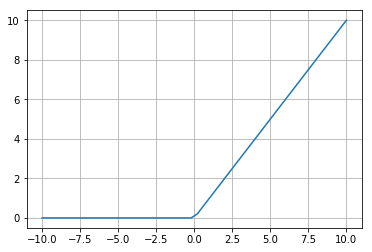

In [13]:
plt.plot(np.linspace(-10, 10), np.maximum(np.linspace(-10, 10), 0));plt.grid()

The Rectified Linear Unit. It computes the function $f(x)=max(0,x)$. In other words, the activation is simply thresholded at zero. There are several pros and cons to using the ReLUs:

* (+) It was found to greatly accelerate the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form.
* (+) Compared to tanh/sigmoid neurons that involve expensive operations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero.
* (-) Unfortunately, ReLU units can be fragile during training and can “die”. For example, a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any datapoint again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. That is, the ReLU units can irreversibly die during training since they can get knocked off the data manifold. For example, you may find that as much as 40% of your network can be “dead” (i.e. neurons that never activate across the entire training dataset) if the learning rate is set too high. With a proper setting of the learning rate this is less frequently an issue.

## Loss functions

#### Regression
* L2 norm squared loss
<br>
$L_i = \Vert f - y_i \Vert_2^2$
<br>
The reason the L2 norm is squared in the objective is that the gradient becomes much simpler, without changing the optimal parameters since squaring is a monotonic operation. 
* L1 norm loss is sum of the absolute values along each dimension:
$L_i = \Vert f - y_i \Vert_1 = \sum_j \mid f_j - (y_i)_j \mid$

[Differences between L1 and L2 as Loss Function and Regularization](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/)

Question: What is the difference (calculate $\partial{L_i} / \partial{f_j}$ gradient)?

#### Classification
We assume tere is a single correct label (out of a fixed set) for each example. **Cross-entropy loss**:
<br>
$\large L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right)$




#### Attribute classification
$y_i$ is a binary vector: 1 - sample have certain attribute, 0 - sample do not have certain attribute. Maximum likelihood loss function is:
<br>
$\large L_i = \sum_j y_{ij} \log(\sigma(f_j)) + (1 - y_{ij}) \log(1 - \sigma(f_j))$
<br>
where the labels $y_{ij}$ are assumed to be either 1 (positive) or 0 (negative), and $\sigma(⋅)$ is the sigmoid function.

## Optimization

#### SGD (stochastic gradient descent)
The simplest form of update is to change the parameters along the negative gradient direction.
```python
# SGD update
x += - learning_rate * dx
```


<tr>
<td> <img src='img/sgdvsgd.png' width="400px"> </td>
<td> <img src="img/gradient.jpg" height="400px"/> </td>
</tr>

#### Gradient descent with momentum

This approach almost always enjoys better converge rates on deep networks. This update can be motivated from a physical perspective of the optimization problem. Initializing the parameters with random numbers is equivalent to setting a particle with zero initial velocity at some location. The optimization process can then be seen as equivalent to the process of simulating the particle as rolling on the landscape.

Since the force on the particle is related to the gradient of potential energy (i.e. $F = - \nabla U$ ), the force felt by the particle is precisely the (negative) gradient of the loss function. Moreover, $F=ma$ so the (negative) gradient is in this view proportional to the acceleration of the particle. Note that this is different from the SGD update shown above, where the gradient directly integrates the position. Instead, the physics view suggests an update in which the gradient only directly influences the velocity, which in turn has an effect on the position:
```python
# Momentum update
v = mu * v - learning_rate * dx # integrate velocity
x += v # integrate position
```
Here we see an introduction of a v variable that is initialized at zero, and an additional hyperparameter (mu) which is called momentum (its typical value is about 0.9), but its physical meaning is more consistent with the coefficient of friction. Effectively, this variable damps the velocity or otherwise the particle would never come to a stop at the bottom of a hill. When cross-validated, this parameter is usually set to values such as [0.5, 0.9, 0.95, 0.99]. Similar to annealing schedules for learning rates (discussed later, below), optimization can sometimes benefit a little from momentum schedules, where the momentum is increased in later stages of learning. A typical setting is to start with momentum of about 0.5 and anneal it to 0.99 or so over multiple epochs.

#### Nesterov Momentum
This is a slightly different version of the momentum update that has recently been gaining popularity. It enjoys stronger theoretical converge guarantees for convex functions and in practice it also consistenly works slightly better than standard momentum.
![nesterov](img/nesterov.jpeg)
```python
x_ahead = x + mu * v
# evaluate dx_ahead (the gradient at x_ahead instead of at x)
v = mu * v - learning_rate * dx_ahead
x += v
```

### Annealing the learning rate
In training deep networks, it is usually helpful to anneal the learning rate over time. Good intuition to have in mind is that with a high learning rate, the system contains too much kinetic energy and the parameter vector bounces around chaotically, unable to settle down into deeper, but narrower parts of the loss function. Knowing when to decay the learning rate can be tricky: Decay it slowly and you’ll be wasting computation bouncing around chaotically with little improvement for a long time. But decay it too aggressively and the system will cool too quickly, unable to reach the best position it can. There are three common types of implementing the learning rate decay:

* **Step decay**: Reduce the learning rate by some factor every few epochs. Typical values might be reducing the learning rate by a half every 5 epochs, or by 0.1 every 20 epochs. These numbers depend heavily on the type of problem and the model. One heuristic you may see in practice is to watch the validation error while training with a fixed learning rate, and reduce the learning rate by a constant (e.g. 0.5) whenever the validation error stops improving.
* **Exponential decay**. has the mathematical form $\alpha = \alpha_0 e^{-k t}$, where $\alpha_0, k$ are hyperparameters and t is the iteration number (but you can also use units of epochs).
* **1/t decay** has the mathematical form $\alpha = \alpha_0 / (1 + k t )$ where $\alpha_0, k$ are hyperparameters and t is the iteration number.


### Adam

Adam is a method for efficient stochastic optimization that only requires first-order gradients with little memory requirement. The method computes **individual adaptive learning rates for different parameters** from estimates of first and second moments of the gradients; the name Adam is derived from adaptive moment estimation. Some of Adam’s advantages are that the magnitudes of parameter updates are **invariant** to rescaling of the gradient, its stepsizes are approximately bounded by the stepsize hyperparameter, it does not require a stationary objective, it works with sparse gradients, and it naturally performs a form of step size annealing.
<br>
[Paper](https://arxiv.org/pdf/1412.6980.pdf)

![adam](img/adam.png)

### Differnet optimizers

<tr>
<td> <img src="img/optimizers.gif" /> </td>
<td> <img src="img/optimizers2.gif" /> </td>
</tr>


## Data preprocessing

* **Mean subtraction** is the most common form of preprocessing. It involves subtracting the mean across every individual feature in the data, and has the geometric interpretation of centering the cloud of data around the origin along every dimension.

* **Normalization** refers to normalizing the data dimensions so that they are of approximately the same scale. There are two common ways of achieving this normalization. One is to divide each dimension by its standard deviation, once it has been zero-centered. Another form of this preprocessing normalizes each dimension so that the min and max along the dimension is -1 and 1 respectively. 
It only makes sense to apply this preprocessing if you have a reason to believe that different input features have different scales (or units), but they should be of approximately equal importance to the learning algorithm.

![preprocessing](img/preprocessing.jpeg)

## Regularizations

#### L2 regularization 
L2 regularization penalizes the squared magnitude of all parameters directly in the objective. That is, for every weight $w$ in the network, we add the term $\frac{1}{2} \lambda w^2$ to the objective, where $\lambda$ is the regularization strength. The L2 regularization has the intuitive interpretation of heavily penalizing peaky weight vectors and preferring diffuse weight vectors. Note that during gradient descent parameter update, using the L2 regularization ultimately means that every weight is decayed linearly: $W \mathrel{+}= -\lambda  W$ towards zero.

#### L1 regularization
For each weight $w$ we add the term $\lambda|w|$ to the objective. It is possible to combine the L1 regularization with the L2 regularization: $\lambda_1 ∣w∣+\lambda_2 w^2$ (this is called Elastic net regularization). The L1 regularization has the intriguing property that it leads the weight vectors to become sparse during optimization (i.e. very close to exactly zero). In other words, neurons with L1 regularization end up using only a sparse subset of their most important inputs and become nearly invariant to the “noisy” inputs. In comparison, final weight vectors from L2 regularization are usually diffuse, small numbers. In practice, if you are not concerned with explicit feature selection, L2 regularization can be expected to give superior performance over L1.

#### Dropout
Dropout is an extremely effective, simple and recently introduced regularization technique. While training, dropout is implemented by only keeping a neuron active with some probability p (a hyperparameter), or setting it to zero otherwise. [Paper](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
![dropout](img/dropout.jpeg)

#### Batch normalization
We normalize the input layer by adjusting and scaling the activations. For example, when we have features from 0 to 1 and some from 1 to 1000, we should normalize them to speed up learning. If the input layer is benefiting from it, why not do the same thing also for the values in the hidden layers, that are changing all the time, and get 10 times or more improvement in the training speed.

To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.
<br>
After this shift/scale of activation outputs by some randomly initialized parameters, the weights in the next layer are no longer optimal. SGD ( Stochastic gradient descent) undoes this normalization if it’s a way for it to minimize the loss function.
<br>
Consequently, batch normalization adds two trainable parameters to each layer, so the normalized output is multiplied by a “standard deviation” parameter (gamma) and add a “mean” parameter (beta). In other words, batch normalization lets SGD do the denormalization by changing only these two weights for each activation, instead of losing the stability of the network by changing all the weights.
<br>
![batchnorm](img/batchnorm.png)
* We can use higher learning rates because batch normalization makes sure that there’s no activation that’s gone really high or really low.
* It reduces overfitting because it has a slight regularization effects. Similar to dropout, it adds some noise to each hidden layer’s activations. Therefore, if we use batch normalization, we will use less dropout, which is a good thing because we are not going to lose a lot of information and computational power. However, we should not depend only on batch normalization for regularization; we should better use it together with dropout.

[Paper](https://arxiv.org/pdf/1502.03167.pdf)